<IPython.core.display.Javascript object>


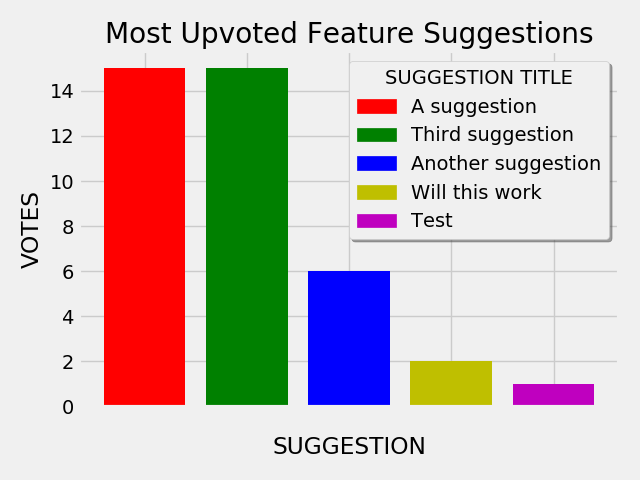

In [69]:
%matplotlib notebook
import matplotlib.pyplot as plt

MYPROJECT = ''
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "UnicornAttractor.settings")
import django
django.setup()

from usersuggestions.data_visualization import get_highest_vote_totals
import matplotlib.patches as mpatches




my_colors = "rgbymc"
# print(get_highest_vote_totals(5))

top_five = get_highest_vote_totals(5)

# for suggestion in top_five:
#     print(suggestion.title)
#     print(suggestion.upvotes)

x = [suggestion.title for suggestion in top_five]

y = [suggestion.upvotes for suggestion in top_five]

# To avoid titles on x axis
# Each entry must have different number of blank spaces
blank_x = ["", " ", "   ","     ","      "]


plt.bar(blank_x,y, color=my_colors)

# plt.axes.get_xaxis().set_visable(False)

handles_list = []
for i in range(len(x)):
    bar = mpatches.Patch(color=my_colors[i], label=x[i])
    handles_list.append(bar)
    
    
plt.legend(handles=handles_list, shadow=True, title="SUGGESTION TITLE")
plt.title("Most Upvoted Feature Suggestions")
plt.ylabel("VOTES")
plt.xlabel("SUGGESTION")

plt.show()

<IPython.core.display.Javascript object>


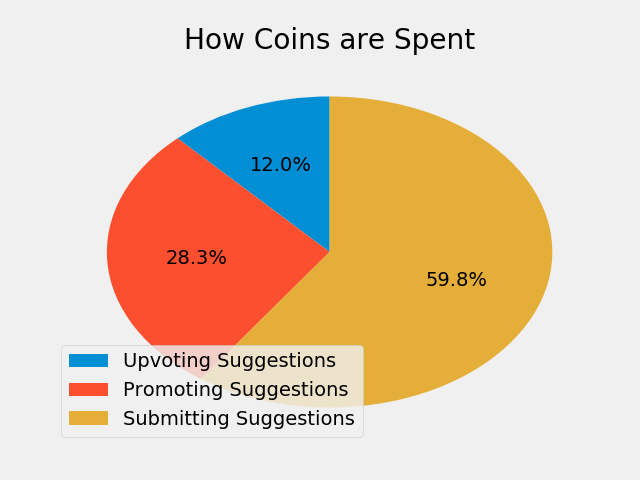

In [73]:
%matplotlib notebook
import matplotlib.pyplot as plt

MYPROJECT = ''
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "UnicornAttractor.settings")
import django
django.setup()




from usersuggestions.data_visualization import get_coin_expenditures

totals = get_coin_expenditures()

slices = [totals["upvoting"],totals["promoting_suggestion"], totals["submissions"]]
labels = ["Upvoting Suggestions","Promoting Suggestions", "Submitting Suggestions"]
plt.pie(slices, labels=None, autopct='%1.1f%%', startangle=90)
plt.title("How Coins are Spent")


plt.legend(labels=labels)
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
3


<IPython.core.display.Javascript object>


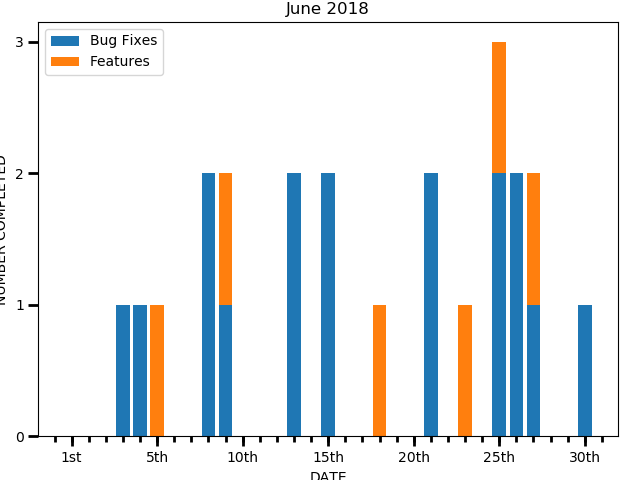

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
# import numpy as np
import matplotlib.ticker as ticker

MYPROJECT = ''
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "UnicornAttractor.settings")
import django
django.setup()
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedLocator, FuncFormatter



from usersuggestions.data_visualization import return_data_for_completion_dates_chart

admin_suggestion_data = return_data_for_completion_dates_chart()


june_days = [day for day in range(0, 31)]
print(june_days)

bugs = admin_suggestion_data["bugs"]
features = admin_suggestion_data["features"]

bug_completion_days = [bug.date_completed.day for bug in bugs]
feature_completion_days = [feature.date_completed.day for feature in features]

bug_june_day_counts = []
feature_june_day_counts = []

for june_day in june_days:
    bug_count = 0
    feature_count = 0
    for bug_day in bug_completion_days:
        if bug_day == june_day:
            bug_count += 1
    for feature_day in feature_completion_days:
        if feature_day == june_day:
            feature_count += 1
            
    bug_june_day_counts.append(bug_count)
    feature_june_day_counts.append(feature_count)
    
    
def format_ticks_as_dates(x,i):
    if i==1:
        return "1st"
    elif i!=0:
        return "{}th".format(int(x))
    else:
        return ""
    
    


y_axis_height= [(bug_june_day_counts[day] + feature_june_day_counts[day]) for day in range(len(june_days)) ]
max_y_axis_height = max(y_axis_height)

minorLocator = MultipleLocator(1)
majorFormatter = FuncFormatter(format_ticks_as_dates)
majorLocator = MultipleLocator(5)

fig, ax = plt.subplots()

p1 = plt.bar(june_days, bug_june_day_counts)
p2 = plt.bar(june_days, feature_june_day_counts, bottom=bug_june_day_counts)

plt.yticks(range((max_y_axis_height+1)))


ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)

# Code from:https://matplotlib.org/gallery/ticks_and_spines/major_minor_demo.html#sphx-glr-gallery-ticks-and-spines-major-minor-demo-py

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
plt.tight_layout()

plt.ylabel("NUMBER COMPLETED")
plt.xlabel("DATE")
plt.title("Bug Fixes and Features Completed\nJune 2018")
plt.legend(labels=["Bug Fixes", "Features"])
plt.show()




In [4]:
# 